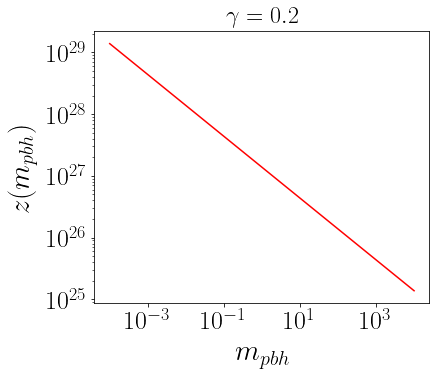

In [1]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy import integrate
from accretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})

bin_centres = np.geomspace(1e4, 1e-4, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(1e4, 1e-4, 6)
m_2 = np.geomspace(1e4, 1e-4, 6)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist() 



plt.figure(figsize = (6, 5))
plt.loglog(m_1 , z_pbh(m_1, γ = 0.2), 'r')
plt.xlabel('$m_{pbh}$', fontsize = 29, labelpad = 10) 
plt.ylabel('$z(m_{pbh})$', fontsize = 29, labelpad = 10)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.title('$\gamma = 0.2$', fontsize = 24, pad = 8)
plt.show()

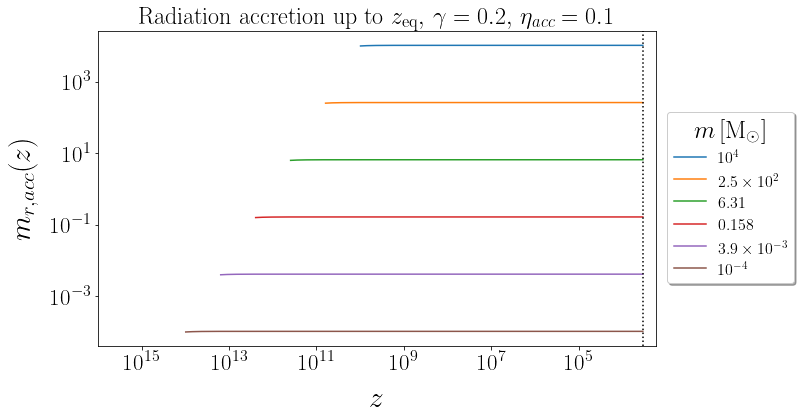

In [3]:
#Accretion of radiation around the PBH in radiation domination 
# as per ρ = ρ_r0 (1 + z)⁴ up to z_eq.
# v<< c_s
# Using dt/dz as per t = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)) 
# with s = a/a_eq



def m_racc(γ, m, z):
    z_i = z_pbh(m,  γ)
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * ((3/(8 * π * G * ρ_c0))**(1/2))
    def integral(z):
        y = (1 + z)
        a = Ω_r0
        b = Ω_m0
        first_term = np.sqrt(a) * (y**3) * (2 * a**2 * y**2 - a * b * y - 3 * b**2)
        second_term = 3 * (b**(5/2)) * (y**(5/2)) * np.sqrt((a * y/b) + 1) * np.arcsinh(np.sqrt(a * y/b)) 
        third_term = 4 * (a**(5/2)) * np.sqrt((y**(5)) * (a * y + b)) 
        return (first_term + second_term)/ third_term 
    
    return 1/(α *  ρ_r0  * (integral(z) - integral(z_i)) *  η_acc   + 1/m )


fig, ax = plt.subplots(1, figsize = (10, 5.8))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    γ = 0.2
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, m_racc(γ, m, z)/M_solar , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$z$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$m_{r, acc}(z) $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_eq)
plt.title('Radiation accretion up to $z_\mathrm{eq}, \, \gamma = 0.2,\, \eta_{acc} = 0.1$', fontsize = 24, pad = 8)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

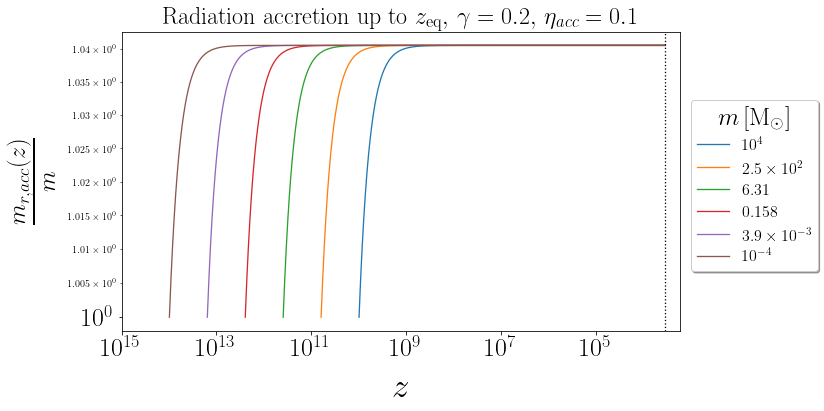

In [4]:
fig, ax = plt.subplots(1, figsize = (10, 5.5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    γ = 0.2
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, m_racc(γ , m, z)/m , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xlabel('$z$',fontsize = 35, labelpad = 12)
plt.ylabel(r'$\frac{m_{r, acc}(z)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e15, 0.5 * z_eq)
plt.title('Radiation accretion up to $z_\mathrm{eq}, \, \gamma = 0.2,\, \eta_{acc} = 0.1 $', fontsize = 24, pad = 8)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

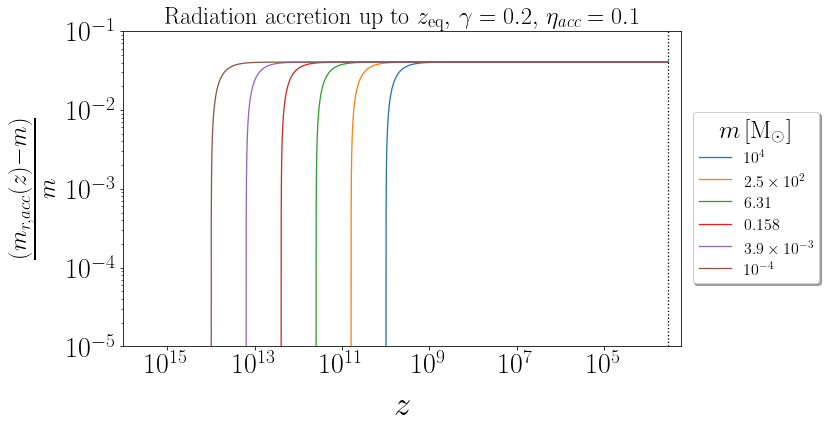

In [5]:
fig, ax = plt.subplots(1, figsize = (10, 5.8))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    γ = 0.2
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, (m_racc(γ , m, z)- m)/m , color = color) 
    
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.xlabel('$z$',fontsize = 34.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_{r, acc}(z) - m)}{m} $',fontsize = 34.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)
plt.xlim(1e16, 0.5*z_eq)
plt.ylim(1e-5, 0.1)
plt.title('Radiation accretion up to $z_\mathrm{eq} , \, \gamma = 0.2,\, \eta_{acc} = 0.1$', fontsize = 24, pad = 8)
plt.savefig('racc_fractional.pdf', bbox_inches = 'tight')
plt.show()

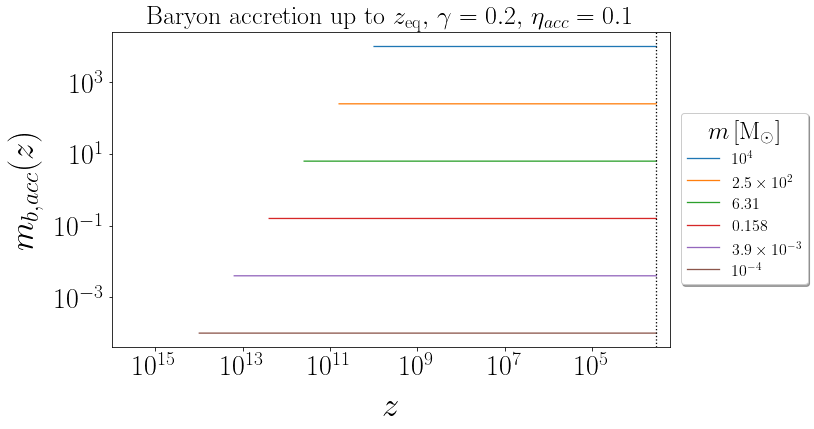

In [6]:
### Accretion of baryons around the PBH in radiation domination 
# as per ρ = ρ_r0 (1 + z)³ up to z_eq.
# v<< c_s
# Using dt/dz as per t = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)) 
# with s = a/a_eq



def m_bacc(γ, m, z):
    z_i = z_pbh(m,  γ)
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * ((3/(8 * π * ρ_c0 * G))**(1/2))
    def integral(z):
        y = (1 + z)
        a = Ω_r0
        b = Ω_m0
        first_term = np.sqrt(a) * (y**3) * (a * y + b)
        second_term = (b**(3/2)) * (y**(5/2)) * np.sqrt((a* y/b) + 1) * np.arcsinh(np.sqrt(a * y/b)) 
        third_term = (a**(3/2)) * np.sqrt((y**(5)) * (a * y + b)) 
        return (first_term - second_term)/ third_term 
    
    return 1/(α *  ρ_m0  * (integral(z) - integral(z_i)) *  η_acc  + 1/m )




fig, ax = plt.subplots(1, figsize = (10, 5.8))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    γ = 0.2
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, m_bacc(γ, m, z)/M_solar , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.xlabel('$z$',fontsize = 34.5, labelpad = 12)
plt.ylabel(r'$m_{b, acc}(z)$',fontsize = 34.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.xlim(1e16, 0.5*z_eq)
plt.title('Baryon accretion up to $z_\mathrm{eq} , \, \gamma = 0.2, \, \eta_{acc} = 0.1$', fontsize = 26, pad = 8)
#plt.savefig('bacc.pdf', bbox_inches = 'tight')
plt.show()

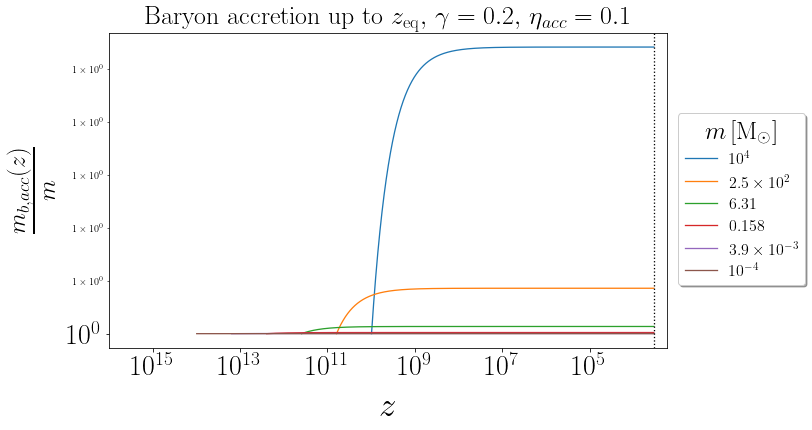

In [22]:
fig, ax = plt.subplots(1, figsize = (10, 5.8))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    γ = 0.2
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, m_bacc(γ, m, z)/m , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 28)
plt.yticks(fontsize = 28)
plt.xlabel('$z$',fontsize = 35, labelpad = 12)
plt.ylabel(r'$\frac{m_{b, acc}(z)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.xlim(1e16, 0.5*z_eq)
#plt.ylim(1e-16, 1e-2)
plt.title('Baryon accretion up to $z_\mathrm{eq} , \, \gamma = 0.2, \, \eta_{acc} = 0.1$', fontsize = 26, pad = 8)
#plt.savefig('bacc.pdf', bbox_inches = 'tight')
plt.show()

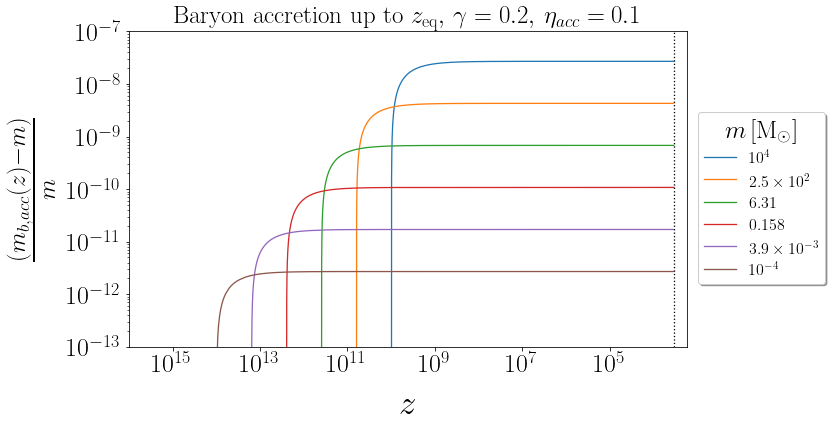

In [8]:
fig, ax = plt.subplots(1, figsize = (10, 5.8))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    γ = 0.2
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, (m_bacc(γ, m, z)- m)/m , color = color) 
    
    
plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xlabel('$z$',fontsize = 35, labelpad = 12)
plt.ylabel(r'$\frac{(m_{b, acc}(z) - m)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.xlim(1e16, 0.5*z_eq)
plt.ylim(1e-13, 1e-7)
plt.title('Baryon accretion up to $z_\mathrm{eq}, \, \gamma = 0.2, \, \eta_{acc} = 0.1$', fontsize = 25, pad = 8)
plt.savefig('bacc_fractional.pdf', bbox_inches = 'tight')
plt.show()

In [9]:
# Radiation and matter accretion in RD for different values of γ.
# Here, γ is the ratio between the PBH mass and the horizon mass.
# Using dt/dz as per t = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((2/3) * (s-2) * np.sqrt(s+1) + (4/3)) 
# with s = a/a_eq



def Horizon_by_PBH_mass(γ, m, z, radiation):
    if radiation == True:
        value = (m_racc(γ, m, z) - m)/m
    else:
        value = (m_bacc(γ, m, z) - m)/m
    return value


γ = np.geomspace(1, 0.1, 5)

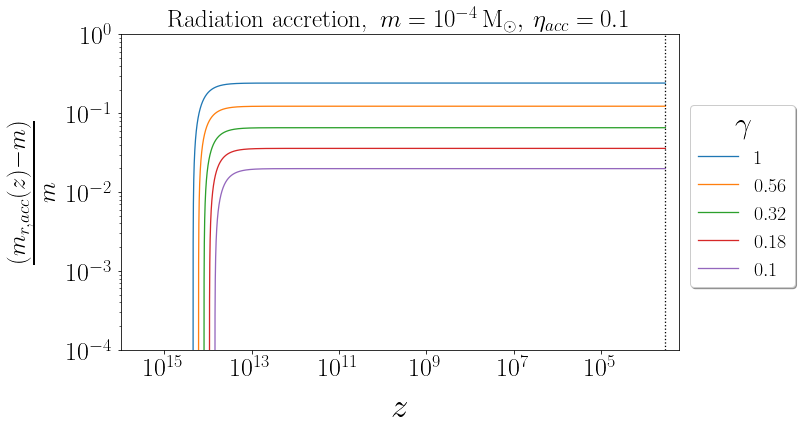

In [10]:
fig, ax = plt.subplots(1, figsize = (10, 5.8))
colors = ['C0', 'C1','C2','C3','C4', 'C5']
γ = np.geomspace(1, 0.1, 5)

for i, (γ, color) in enumerate(zip(γ, colors)): 
    m = m_1_list[-1]
    m*= M_solar
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, Horizon_by_PBH_mass(γ, m, z, radiation = True), color = color) 
    

plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xlabel('$z$',fontsize = 35, labelpad = 12)
plt.ylabel(r'$\frac{(m_{r, acc}(z) - m)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$1$', r'$0.56$',
            '$0.32$', '$0.18$', '$0.1$'], 
           prop = {'size':20}, loc = (1.02, 0.2), shadow = True, 
           title = '$\gamma$' ,
           title_fontsize = 30, facecolor = 'white', fontsize = 75)

plt.xlim(1e16, 0.5*z_eq)
plt.ylim(1e-4, 1)
plt.title('Radiation accretion, $\,m = 10^{-4}\,\mathrm{M_{\odot}}, \, \eta_{acc} = 0.1$', fontsize = 25, pad = 8)
plt.savefig('γ_racc.pdf', bbox_inches = 'tight')
plt.show()

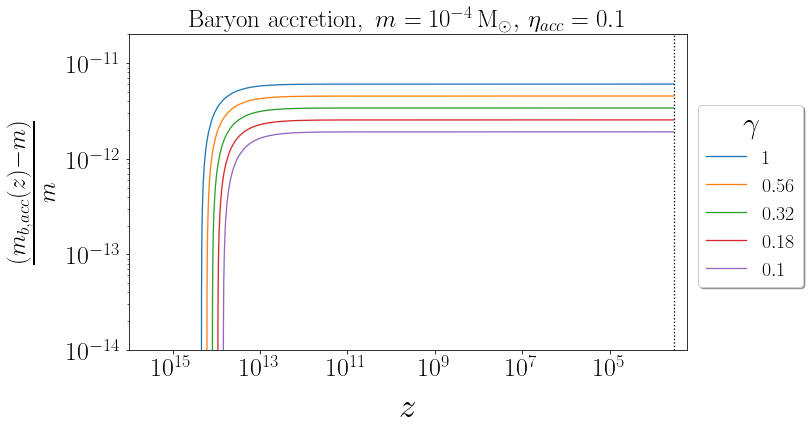

In [11]:
fig, ax = plt.subplots(1, figsize = (10, 5.8))
colors = ['C0', 'C1','C2','C3','C4', 'C5']
γ = np.geomspace(1, 0.1, 5)

for i, (γ, color) in enumerate(zip(γ, colors)): 
    m = m_1_list[-1]
    m*= M_solar
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, Horizon_by_PBH_mass(γ, m, z, radiation = False), color = color) 
    

plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xlabel('$z$',fontsize = 35, labelpad = 12)
plt.ylabel(r'$\frac{(m_{b, acc}(z) - m)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$1$', r'$0.56$',
            '$0.32$', '$0.18$', '$0.1$'], 
           prop = {'size':20}, loc = (1.02, 0.2), shadow = True, 
           title = '$\gamma$' ,
           title_fontsize = 30, facecolor = 'white', fontsize = 75)

plt.xlim(1e16, 0.5*z_eq)
plt.ylim(1e-14, 2e-11)
plt.title('Baryon accretion, $\,m = 10^{-4}\,\mathrm{M_{\odot}}, \, \eta_{acc} = 0.1$', fontsize = 25, pad = 8)
plt.savefig('γ_bacc.pdf', bbox_inches = 'tight')
plt.show()

In [17]:
# Radiation and matter accretion in RD for different values of γ.
# Here, γ is the ratio between the PBH mass and the horizon mass.
# Using dt/dz as per t = np.sqrt(3/(4 * np.pi * G * ρ_eq)) * ((s**2)/2) 
# (valid for smalls) and also as per t = t_eq * ((a/a_eq)**2).
# with s = a/a_eq


def m_racc(γ, m, z):
    z_i = z_pbh(m,  γ)
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * ((3/(8 * π * G * ρ_c0))**(1/2))
    z_i = z_pbh(m,  γ)
    return 1/((α/np.sqrt(Ω_r0)) *  (ρ_r0/2) * (z - z_i) * (z + z_i + 2) *  η_acc   + 1/m )




def m_bacc(γ, m, z):
    z_i = z_pbh(m,  γ)
    c_s  = c/np.sqrt(3)
    α  = ((4 * π * (G**2))/(c_s**3)) * ((3/(8 * π * ρ_c0 * G))**(1/2))
    z_i = z_pbh(m,  γ)
    return 1/((α/np.sqrt(Ω_r0)) *  ρ_m0 * (z - z_i)  *  η_acc   + 1/m )


In [18]:
def Horizon_by_PBH_mass_2(γ, m, z, radiation):
    if radiation == True:
        value = (m_racc(γ, m, z) - m)/m
    else:
        value = (m_bacc(γ, m, z) - m)/m
    return value

γ = np.geomspace(1, 0.1, 5)

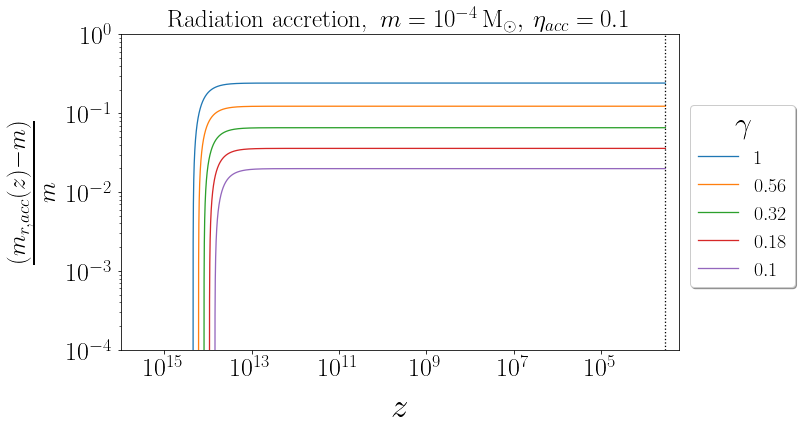

In [19]:
fig, ax = plt.subplots(1, figsize = (10, 5.8))
colors = ['C0', 'C1','C2','C3','C4', 'C5']
γ = np.geomspace(1, 0.1, 5)

for i, (γ, color) in enumerate(zip(γ, colors)): 
    m = m_1_list[-1]
    m*= M_solar
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, Horizon_by_PBH_mass(γ, m, z, radiation = True), color = color) 
    


plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xlabel('$z$',fontsize = 35, labelpad = 12)
plt.ylabel(r'$\frac{(m_{r, acc}(z) - m)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$1$', r'$0.56$',
            '$0.32$', '$0.18$', '$0.1$'], 
           prop = {'size':20}, loc = (1.02, 0.2), shadow = True, 
           title = '$\gamma$' ,
           title_fontsize = 30, facecolor = 'white', fontsize = 75)

plt.xlim(1e16, 0.5*z_eq)
plt.ylim(1e-4, 1)
plt.title('Radiation accretion, $\,m = 10^{-4}\,\mathrm{M_{\odot}}, \, \eta_{acc} = 0.1$', fontsize = 25, pad = 8)
plt.savefig('γ_racc.pdf', bbox_inches = 'tight')
plt.show()

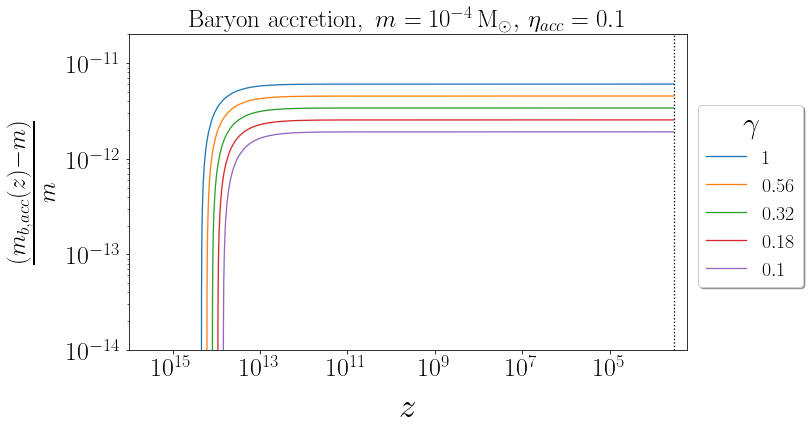

In [21]:
fig, ax = plt.subplots(1, figsize = (10, 5.8))
colors = ['C0', 'C1','C2','C3','C4', 'C5']
γ = np.geomspace(1, 0.1, 5)

for i, (γ, color) in enumerate(zip(γ, colors)): 
    m = m_1_list[-1]
    m*= M_solar
    z_i = z_pbh(m,  γ)
    z = np.geomspace(z_i, z_eq, 100000)
    ax.loglog(z, Horizon_by_PBH_mass(γ, m, z, radiation = False), color = color) 
    

plt.axvline(x = z_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xlabel('$z$',fontsize = 35, labelpad = 12)
plt.ylabel(r'$\frac{(m_{b, acc}(z) - m)}{m} $',fontsize = 35, labelpad = 12)
plt.legend(['$1$', r'$0.56$',
            '$0.32$', '$0.18$', '$0.1$'], 
           prop = {'size':20}, loc = (1.02, 0.2), shadow = True, 
           title = '$\gamma$' ,
           title_fontsize = 30, facecolor = 'white', fontsize = 75)

plt.xlim(1e16, 0.5*z_eq)
plt.ylim(1e-14, 2e-11)
plt.title('Baryon accretion, $\,m = 10^{-4}\,\mathrm{M_{\odot}}, \, \eta_{acc} = 0.1$', fontsize = 25, pad = 8)
plt.savefig('γ_bacc.pdf', bbox_inches = 'tight')
plt.show()